In [3]:
import pandas as pd
from oct_Utils import *
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
file_path='/home/octusr3/project/oct/temp/data.csv'
data=pd.read_csv(file_path)


/home/octusr3/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:

df_num = pd.read_csv(f'/home/octusr3/project/oct/temp/df4R_num_pdp.csv')
df_pred = pd.read_csv(f'/home/octusr3/project/oct/temp/df4R_pred_pdp.csv')

In [5]:
class_mapping = {
    0: 1,
    0.005: 1,
    0.01: 1,
    0.02: 1,
    0.05: 1,
    0.95: 0,
    0.98: 0,
    0.99: 0,
    0.995: 0,
    1: 0,
}
valid_cols = [f'l{i}' for i in range(1, 55)]
valid_cols.remove('l26')
valid_cols.remove('l35')
for col in valid_cols:
    df_num[col] = df_num[col].map(class_mapping)#计算分类错误点数
    df_pred[col] = df_pred[col].map(class_mapping)

In [6]:
bupt=pd.DataFrame()
temp={
    True:1,
    False:0
}
for col in valid_cols:#用来计算分类错误的点
    bupt[col]=df_num[col]!=df_pred[col]
    bupt[col]=bupt[col].map(temp)
bupt['Row_sum'] = bupt.apply(lambda x: x.sum(),axis=1)
data['Row_mistake_sum']=bupt['Row_sum']
test_data=data.sort_values(by='Row_mistake_sum',ascending=False).iloc[0:30]#

In [7]:
def fill_array(input:str):#现在用的都是正正常常的数据，经过重新组织过的数据，序列是对的上的
    position_list=[(1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2),
     (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7),
    (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), 
    (6, 5), (6, 6), (6, 7), (6, 8), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 3), (8, 4), (8, 5), (8, 6)]
    temp_data=str_to_np_array(input)
    res=np.zeros((10,10))
    for i,j in zip(temp_data,position_list):
        res[j[0]][j[1]]=int(i)
    return str(res)
test_data['pred']=test_data['pred'].apply(fill_array)

In [8]:
def construct_two_class_mat(data):
    position_list=[(1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2),
     (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7),
    (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), 
    (6, 5), (6, 6), (6, 7), (6, 8), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 3), (8, 4), (8, 5), (8, 6)]
    temp_data=[f'l{i}' for i in range(1, 55)]
    res=np.zeros((10,10))
    for i,j in zip(temp_data,position_list):
        res[j[0]][j[1]]=data[i]
    return str(res)

In [9]:
test_data=test_data.join(df_num[[f'l{i}' for i in range(1, 55)]])#对数据join,增加分类结果
test_data['classification_num']=test_data.apply(construct_two_class_mat,axis=1)
test_data=test_data.drop([f'l{i}' for i in range(1, 55)],axis=1)
test_data=test_data.join(df_pred[[f'l{i}' for i in range(1, 55)]])
test_data['classification_pred']=test_data.apply(construct_two_class_mat,axis=1)
test_data=test_data.drop([f'l{i}' for i in range(1, 55)],axis=1)

In [11]:
test_data

,image_path,source,pid,dates,eye,pos,num,pd_prob,dataset,pred,Row_mistake_sum,classification_num,classification_pred
2626,20210730-中山眼科-OCT转VF/IG/CRC-022-0106/IG010045/...,IG,CRC-022-0106,2019-04-15,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
8024,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-557/2019...,CASIA数据汇总-new,CS-557,2019-09-29,OS,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,3,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0....,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
7967,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-389/2019...,CASIA数据汇总-new,CS-389,2019-08-27,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,3,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0....,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
2625,20210730-中山眼科-OCT转VF/IG/CRC-022-0101/IG010146/...,IG,CRC-022-0101,2019-04-11,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,1,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
11327,20210812-sysu-oct/ANGIO2/LBC-0275/20160711/OD/...,ANGIO2,LBC-0275,2016-07-11,OD,disc,[[ 0 0 0 28 25 23 25 0 0 0]\n [ 0 0 23 2...,[[0 0 0 1 1 1 1 0 0 0]\n [0 0 2 1 1 1 1 1 0 0]...,4,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
11326,20210812-sysu-oct/ANGIO2/LBC-0275/20160412/OS/...,ANGIO2,LBC-0275,2016-04-12,OS,disc,[[ 0 0 0 22 23 20 19 0 0 0]\n [ 0 0 18 2...,[[0 0 0 1 1 1 1 0 0 0]\n [0 0 2 2 1 1 1 1 0 0]...,4,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
11325,20210812-sysu-oct/ANGIO2/LBC-0275/20160412/OD/...,ANGIO2,LBC-0275,2016-04-12,OD,disc,[[ 0 0 0 8 12 11 21 0 0 0]\n [ 0 0 9 -...,[[0 0 0 4 3 3 1 0 0 0]\n [0 0 5 5 2 4 1 1 0 0]...,4,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
11324,20210812-sysu-oct/ANGIO2/CRC-016-049/20201120/...,ANGIO2,CRC-016-049,2020-11-20,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 1...,4,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
203,20210730-中山眼科-OCT转VF/IG/CRC-022-0227/IG010259/...,IG,CRC-022-0227,2019-08-22,OS,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 5...,0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,41.0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...
2483,20210730-中山眼科-OCT转VF/CASIA数据汇总-new/CS-232/2019...,CASIA数据汇总-new,CS-232,2019-06-20,OD,disc,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 3...,1,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,40.0,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...,[[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]\n [...


In [ ]:
def show_heatmap_of_results(test_data:pd.DataFrame,data_num=2):
    draw_list= ['num', 'pred', 'classification_num','classification_pred']
    #plt.figure(figsize=(data*10,40))
    fig,axes=plt.subplots(data_num,4)
    for i in range(data_num):
        for j  in range(4):
            sns.heatmap(pd.DataFrame(str_to_np_mat(test_data.iloc[i][draw_list[j]])),cmap="Greys",annot=True,ax=axes[i][j])
            #print(type(str_to_np_mat(test_data.iloc[i][draw_list[j]])))

In [ ]:
show_heatmap_of_results(test_data)

/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning

/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning

/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning

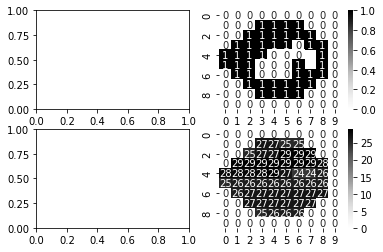

In [12]:

fig,axes=plt.subplots(2,2)#fig是整个画布，axes是子图,1，2表示1行两列
sns.heatmap(df,cmap="Greys",annot=True,ax=axes[0][1])
#plt.subplots_adjust(wspace=0.5)#子图很有可能左右靠的很近，调整一下左右距离
sns.heatmap(pd.DataFrame(str_to_np_mat(test_data.iloc[0]['pred'])),cmap="Greys",annot=True,ax=axes[1][1])
#fig.set_figwidth(10)#这个是设置整个图（画布）的大小
